# Análisis de la Varianza
## ANOVA de una Vía

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [13]:
np.random.seed(2020)
voters_Race = np.random.choice(a = ["asiatico","blanco","negro","hispano","otros"], p =[0.05,0.50,0.20,0.10,0.15], size = 1000 )
voters_age = stats.poisson.rvs(loc = 18, mu=25, size = 1000) # loc es para que empieze desde ahí..

voters = pd.DataFrame({'race':voters_Race, 'age':voters_age})
treatments = voters.groupby('race').groups

In [10]:
treatments # me indica que filas del DataFrame original ( del voters ) son los
# que pertenecen a c/categoría. 

{'asiatico': Int64Index([ 26,  55,  65,  73,  85, 109, 110, 133, 151, 162, 183, 184, 275,
             278, 290, 308, 331, 349, 368, 395, 398, 403, 404, 517, 518, 519,
             539, 623, 629, 679, 688, 711, 747, 760, 815, 834, 894, 897, 898,
             901, 911, 919, 931, 943, 951, 954, 970, 980, 988],
            dtype='int64'),
 'blanco': Int64Index([  2,   3,   4,   5,   6,   7,   9,  10,  13,  14,
             ...
             974, 981, 982, 985, 986, 989, 993, 995, 996, 998],
            dtype='int64', length=507),
 'hispanos': Int64Index([ 11,  39,  41,  42,  58,  67,  77,  84, 124, 137, 141, 157, 159,
             167, 185, 197, 221, 228, 232, 241, 246, 258, 259, 324, 337, 341,
             343, 350, 352, 358, 371, 373, 410, 416, 435, 436, 440, 448, 456,
             473, 479, 481, 482, 489, 504, 521, 532, 536, 537, 552, 555, 558,
             574, 580, 584, 590, 593, 595, 596, 607, 609, 636, 661, 667, 683,
             702, 708, 724, 728, 736, 754, 771, 776, 777, 790, 802

In [15]:
asiatico = voters_age[treatments['asiatico']]
blanco = voters_age[treatments['blanco']]
negro = voters_age[treatments['negro']]
hispano =voters_age[treatments['hispano']]
otros = voters_age[treatments['otros']]

$$
\left\{
\begin{array}{ll}
H_0: &\mu_1 =\mu_2 =\mu_3 = \mu_4 =\mu_5\\
H_1: &\exists\ i,j : \mu_i \neq \mu_j
\end{array}
\right.
$$

$$p = P\left(F_{k-1, N-k}\geq \frac{MS_{Tr}}{MS_{E}}\right) $$

In [16]:
stats.f_oneway(asiatico,blanco,negro,hispano,otros)

F_onewayResult(statistic=0.34125500004740417, pvalue=0.8501763879300095)

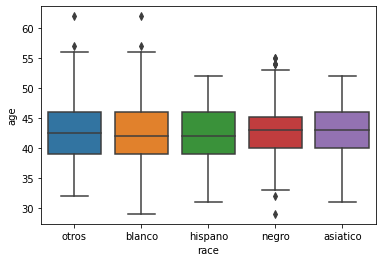

In [18]:
import seaborn as sns ## librería para representaciones gráficas, es super cómoda.
sns.boxplot(x = voters['race'], y = voters['age']) # la x es el factor, y = los datos numéricos.

## ANOVA de una vía con comparación por pares

In [7]:
np.random.seed(2020)
voters_race = np.random.choice(a = ["asiatico","blanco","negro","hispano","otros"], p =[0.05,0.50,0.20,0.10,0.15], size = 1000 )
white_ages = stats.poisson.rvs(loc = 18, mu= 33, size =1000)
voters_age = stats.poisson.rvs(loc = 18, mu= 28, size =1000)
voters_age = np.where(voters_race == "blanco", white_ages, voters_age) # Si es V elige el valor de white_ages en caso F se elige el valor de voters_age


In [9]:
voters = pd.DataFrame({'race':voters_race, 'age':voters_age})
treatments = voters.groupby('race').groups # me indica que filas del DataFrame original ( del voters ) son los
# que pertenecen a c/categoría. 

In [10]:
asiatico = voters_age[treatments['asiatico']]
blanco = voters_age[treatments['blanco']]
negro = voters_age[treatments['negro']]
hispano =voters_age[treatments['hispano']]
otros = voters_age[treatments['otros']]

In [11]:
stats.f_oneway(asiatico,blanco,negro,hispano,otros)

F_onewayResult(statistic=45.463354140190084, pvalue=4.2073377186036713e-35)

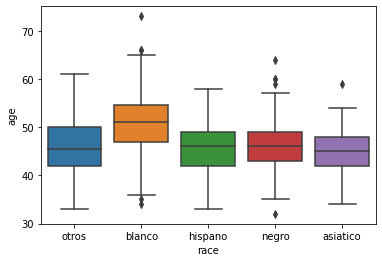

In [36]:
import seaborn as sns
sns.boxplot(x = voters['race'], y = voters['age'])

In [14]:
races = ["asiatico","blanco","negro","hispano","otros"]
race_pairs = []
for race1 in range(4):
  for race2 in range(race1+1,5):
    race_pairs.append((races[race1], races[race2]))
race_pairs

[('asiatico', 'blanco'),
 ('asiatico', 'negro'),
 ('asiatico', 'hispano'),
 ('asiatico', 'otros'),
 ('blanco', 'negro'),
 ('blanco', 'hispano'),
 ('blanco', 'otros'),
 ('negro', 'hispano'),
 ('negro', 'otros'),
 ('hispano', 'otros')]

In [16]:
for race1, race2 in race_pairs:
  print(" **** Comparación de las poblaciones {p1} y {p2}".format(p1=race1, p2=race2))
  ## Ahora hacemos un test de independencia
  tt = stats.ttest_ind(voters_age[treatments[race1]],voters_age[treatments[race2]], equal_var=True ) # utiliza treatments xq es la variable agrupada, así luego puede elegir los datos según sea blanco u otra etnia (según race1 y race2)
  print(tt)

 **** Comparación de las poblaciones asiatico y blanco
Ttest_indResult(statistic=-6.008581613895844, pvalue=3.3932200462588246e-09)
 **** Comparación de las poblaciones asiatico y negro
Ttest_indResult(statistic=-0.9365601540525899, pvalue=0.34987098538665595)
 **** Comparación de las poblaciones asiatico y hispano
Ttest_indResult(statistic=0.1726228075986723, pvalue=0.8631990207756343)
 **** Comparación de las poblaciones asiatico y otros
Ttest_indResult(statistic=-0.7202832776251177, pvalue=0.4722311475285279)
 **** Comparación de las poblaciones blanco y negro
Ttest_indResult(statistic=9.574582080618521, pvalue=1.6424565561685662e-20)
 **** Comparación de las poblaciones blanco y hispano
Ttest_indResult(statistic=8.259362185083596, pvalue=9.461185767908647e-16)
 **** Comparación de las poblaciones blanco y otros
Ttest_indResult(statistic=8.199665103361262, pvalue=1.2916440498166313e-15)
 **** Comparación de las poblaciones negro y hispano
Ttest_indResult(statistic=1.4348772049977305

In [31]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog = voters_age, # endog es la variable numérica
                          groups = voters_race, # indico los grupos
                          alpha = 0.05)  # nivel de significación del contraste

In [32]:
 tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
asiatico,blanco,5.2112,0.001,2.9319,7.4904,True
asiatico,hispano,-0.1473,0.9,-2.8418,2.5472,False
asiatico,negro,0.7505,0.9,-1.6689,3.1698,False
asiatico,otros,0.6682,0.9,-1.8516,3.188,False
blanco,hispano,-5.3585,0.001,-7.085,-3.6319,True
blanco,negro,-4.4607,0.001,-5.7152,-3.2061,True
blanco,otros,-4.5429,0.001,-5.9816,-3.1042,True
hispano,negro,0.8978,0.6756,-1.0099,2.8054,False
hispano,otros,0.8155,0.7834,-1.218,2.849,False
negro,otros,-0.0823,0.9,-1.7339,1.5694,False


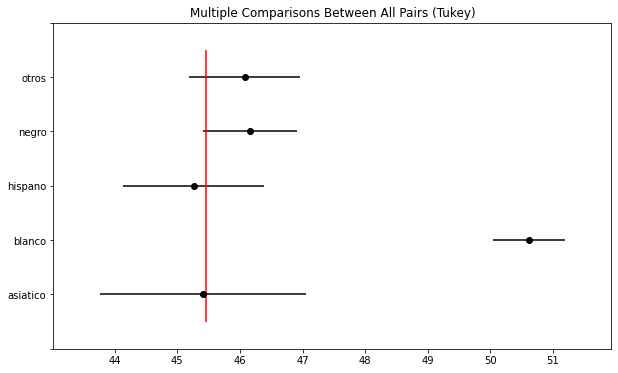

In [34]:
tukey.plot_simultaneous()
plt.vlines(x= 45.46, ymin= -0.5, ymax= 4.5, color="red")
# La media de la población blanca es diferente a las demás subpoblaciones.


## Comprobación de las Hipótesis del ANOVA

### Normalidad de todas las subpoblación

- Comprueba si la población i-ésima es normal


In [39]:
from statsmodels.stats.diagnostic import lilliefors


In [40]:
lilliefors(x=asiatico, dist = "norm") # x es la muestra, dist es cual sería la dist teórica a comprobar
# No hay evidencia para rechazar la normalidad de la población asiática

(0.10687211099450733, 0.2)

In [41]:
lilliefors(x= blanco, dist = "norm")

(0.05209949537699465, 0.0022334262753635242)

In [42]:
lilliefors(x= negro, dist = "norm")

(0.070138244256575, 0.014615275783783289)

In [43]:
lilliefors(x= hispano, dist = "norm")

(0.10473875438620123, 0.01442529486020124)

In [44]:
lilliefors(x= otros, dist = "norm")

(0.07319733042103849, 0.05668875874657659)

**Homocedasticidad**
- Comprueba si La igualdad de varianzas $\sigma_i^2$ son iguales para todo $i$.

In [45]:
from scipy.stats import bartlett

In [46]:
bartlett(asiatico, blanco, negro, hispano, otros)

BartlettResult(statistic=12.098024001177128, pvalue=0.016637026834818578)

In [49]:
from scipy.stats import  levene
levene(asiatico, blanco, negro , hispano, otros)

LeveneResult(statistic=2.926041474639993, pvalue=0.02017405406234456)